<H1>Dataset Loading and Interaction Extraction</h1>

In [27]:
class Sentence:
    def __init__(self):
        self.text = ""
        self.proteins = []
        self.interactions = []
        self.reconstructedText = ""
        self.words = []
        self.valid = False

    def show(self):
        print(self.text)
        print(self.proteins)
        if len(self.interactions):
            for i in self.interactions:
                print(i)
        print()
        
        
    def processText(self):
        #self.text = self.text.replace("_/_","_ _")
        #self.text = self.text.replace("_:_","_ _")
        #self.text = self.text.replace("_-_","_ _")
        self.text = re.sub("(\_[^_]_)", "_ _", self.text)#regexp to remove things like _:_
        self.text = self.text.replace("(_","_")
        self.text = self.text.replace("_)","_")
    
    def checkValidity(self):
        count = 0
        for w in range(len(self.words)):
            if "__" in self.words[w]:
                count = count +1
        
        if count == len(self.proteins):
            self.valid = True
            #print(self.valid)
        
    
    def reconstructText(self):
        self.words = self.text.split(" ")
        self.checkValidity()
        #print(self.words)
        if self.valid:
            p=0
            for w in range(len(self.words)):
                if "__" in self.words[w]:
                    self.words[w] = self.proteins[p]
                    #self.words[w] = "PROTEIN"+str(p)
                    p=p+1
            #print(self.words)
            #print()
        
    def reassembleSentence(self):
        print(" ".join(self.words))
        
    def fullProcess(self):
        self.processText()
        self.reconstructText()
        

In [28]:
import pickle

with open('datasetTrain.pkl', 'rb') as input1:
    trainSetRaw = pickle.load(input1)
    
with open('datasetTest.pkl', 'rb') as input2:    
    testSetRaw = pickle.load(input2)
    
try:
    print(len(trainSetRaw))
    print(len(testSetRaw))
except NameError:
    print("nope")   

2245
529


In [29]:
def findMaxWords(inputList):
    maxwords = -1 
    for i in inputList:
        if len(i.words)>maxwords:
            maxwords = len(i.words)
    print(maxwords)
    

In [30]:
findMaxWords(trainSetRaw)
findMaxWords(testSetRaw)

93
74


<h1>Maximum Words In Sentence</h1>

We start out with
2245 training examples
529 test examples

mean 24.980894015861573
std 10.856406734698178
80 words: 2770
70 words: 2766
60 words: 2751
50 words: 2697
48 words: 2674
40 words: 2544
30 words: 2086

Selecting for under 48 words we are left with
2186 training examples
511 test examples


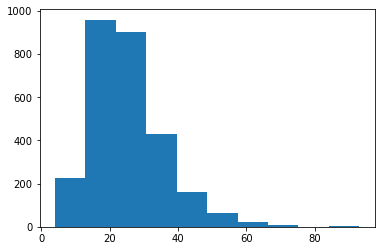

In [31]:
print("We start out with")

print(len(trainSetRaw),"training examples")
print(len(testSetRaw),"test examples")

print()

allSet = [len(x.words) for x in trainSetRaw+testSetRaw]

from matplotlib import pyplot as plt 
import numpy as np  

print("mean",np.mean(allSet))

print("std",np.std(allSet))

plt.hist(allSet)



selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=80 ]

print("80 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=70 ]

print("70 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=60 ]

print("60 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=50 ]

print("50 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=48 ]

print("48 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=40 ]

print("40 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=30 ]

print("30 words:",len(selectedSet))


#HERE
maxSentenceWords = 50

trainSetRaw = [x for x in trainSetRaw if len(x.words)<=maxSentenceWords]
testSetRaw = [x for x in testSetRaw if len(x.words)<=maxSentenceWords]


print()
print("Selecting for under 48 words we are left with")
print(len(trainSetRaw),"training examples")
print(len(testSetRaw),"test examples")

In [32]:
print(trainSetRaw[0])
print()

print(trainSetRaw[0].text)
print()

print(trainSetRaw[0].words)
print()

print(trainSetRaw[0].proteins)



print(len('protein0'))


Cytokines measurements during _________ treatment showed a trend to decreasing levels of ____ at 4, 12, and 24 weeks.

['Cytokines', 'measurements', 'during', 'PROTEIN0', 'treatment', 'showed', 'a', 'trend', 'to', 'decreasing', 'levels', 'of', 'PROTEIN1', 'at', '4,', '12,', 'and', '24', 'weeks.']

['PROTEIN0', 'PROTEIN1']
8


In [33]:
import string
string.ascii_letters

import random
random.choice(string.ascii_letters)

def genRandomWord():
    word = ''
    for letter in range(random.randint(3,9)):
        word+=random.choice(string.ascii_letters)
        
    return word
        

for i,v in enumerate(range(10)):
    print(i,genRandomWord())

0 YlS
1 wSXtYDIch
2 wmYgpx
3 kVB
4 AAzxd
5 RNOHq
6 uLJlY
7 Lwl
8 AVVfvcj
9 dVptXe


In [34]:
import re

re.sub('PROTEIN[0-9]',genRandomWord(),'PROTEINA PROTEIN1 PROTEIN2 is a sentence')




'PROTEINA QlPhuT QlPhuT is a sentence'

In [35]:
proteins = ["Actin","Albumins","Alpha globulin","Arp2/3","Beta globulin","C-myc","C-reactive protein","C1-inhibitor","C3-convertase","CFTR","Cadherin","Calcium channels","Carboxypeptidase","Collagen","Coronin","Dystrphin","Elastin","Ependymin","Estrogen receptor","F-spondin","FOXP2","FOXP3","Factor VIII","Factor XIII","Ferritin","Fibrin","Fibronectin","Gamma globulin","Glucose transporter","Glycophorin D","GroEL ","Hemoglobin","Histones","Hydrolases","IgA","IgD","IgE","IgG","IgM","Insulin","Integrin","Keratin","Muscarinic acetylcholine receptor","MyoD","Myoglobin","Myosin","NCAM","Nebulin","Nicotinic acetylcholine receptor","Oxidoreductases","Oxytocin","P53","Pikachurin","Potassium channels","Protein C","Protein S","Protein Z","Protein Z-related protease inhibitor","Rhodopsin","Scramblase","Selectin","Serum Amyloid P Component","Serum albumin","Sodium channels","Spectrin","Tau","Thrombin","Titin","Transferases","Tropomyosin","Tubulin","Von Willebrand Factor"]

import random

def genRandomProtein():
    return random.choice(proteins)
        

for i,v in enumerate(range(10)):
    print(i,genRandomProtein())

0 Titin
1 Muscarinic acetylcholine receptor
2 Glucose transporter
3 Protein Z-related protease inhibitor
4 IgM
5 Estrogen receptor
6 Histones
7 Thrombin
8 Integrin
9 Cadherin


In [36]:
for i in range(10):
    print('PROTEIN'+str(i))

PROTEIN0
PROTEIN1
PROTEIN2
PROTEIN3
PROTEIN4
PROTEIN5
PROTEIN6
PROTEIN7
PROTEIN8
PROTEIN9


In [37]:
trainSet = []
trainLabel = []

for example in trainSetRaw:
    #print(example.words)
    for interaction in example.interactions:
        sentence =" ".join(example.words)
        
        #print(sentence)
        #print()
        
        if interaction[2] == "True":
            trainLabel = trainLabel + [1]
            #print("HIT")
        else:
            trainLabel = trainLabel + [0]
            #print("MISS")
        
        sentence = sentence.replace(interaction[0],'PROTEINA')
        sentence = sentence.replace(interaction[1],'PROTEINB')
        for i in range(10):
            sentence = sentence.replace('PROTEIN'+str(i),genRandomProtein())
        #sentence = re.sub('PROTEIN[0-9]',genRandomWord(),sentence)
        
        #print(sentence)
        #print()
        #print()
        
        trainSet = trainSet + [sentence]    
            
    #print()
    
    
print(len(trainSet))
print(len(trainLabel))

10394
10394


In [38]:
testSet = []
testLabel = []

for example in testSetRaw:
    #print(example.words)
    for interaction in example.interactions:
        sentence =" ".join(example.words)
        
        #print(sentence)
        #print()
        
        if interaction[2] == "True":
            testLabel = testLabel + [1]
            #print("HIT")
        else:
            testLabel = testLabel + [0]
            #print("MISS")
        
        sentence = sentence.replace(interaction[0],'PROTEINA')
        sentence = sentence.replace(interaction[1],'PROTEINB')
        for i in range(10):
            sentence = sentence.replace('PROTEIN'+str(i),genRandomProtein())
        
        #print(sentence)
        #print()
        #print()
        
        testSet = testSet + [sentence]    
            
    #print()
    
    
print(len(testSet))
print(len(testLabel))

2336
2336


In [39]:
for t in trainSet:
    print(t)
    print()

Cytokines measurements during PROTEINA treatment showed a trend to decreasing levels of PROTEINB at 4, 12, and 24 weeks.

Levels of PROTEINA were slightly increased following PROTEINB treatment (P = 0.09).

This study describes the distributions of PROTEINA as well as mRNAs for PROTEINB Histones collagen types II Myoglobin and III Hydrolases in a growing "cartilage cap" of osteochondroma.

This study describes the distributions of PROTEINA as well as mRNAs for Integrin PROTEINB collagen types II Transferases and III Ferritin in a growing "cartilage cap" of osteochondroma.

This study describes the distributions of PROTEINA as well as mRNAs for Factor XIII Coronin collagen types II PROTEINB and III Carboxypeptidase in a growing "cartilage cap" of osteochondroma.

This study describes the distributions of PROTEINA as well as mRNAs for CFTR Nicotinic acetylcholine receptor collagen types II Dystrphin and III PROTEINB in a growing "cartilage cap" of osteochondroma.

This study describes th

The PROTEINA GroEL  and Calcium channels PROTEINB families of transcription factors function in coupling extracellular signals to alterations in expression of specific target genes.

The IgA PROTEINA and PROTEINB Elastin families of transcription factors function in coupling extracellular signals to alterations in expression of specific target genes.

The Transferases PROTEINA and Ferritin PROTEINB families of transcription factors function in coupling extracellular signals to alterations in expression of specific target genes.

The Thrombin Alpha globulin and PROTEINA PROTEINB families of transcription factors function in coupling extracellular signals to alterations in expression of specific target genes.

Although PROTEINA PROTEINB and Thrombin Coronin were previously thought to interact preferentially with different DNA regulatory elements (the AP-1/TRE and ATF/CRE sites, respectively), we find that members of these two families form selective cross-family heterodimers.

Although P


However, the various Carboxypeptidase complexes display strong differences in the ability to bind to either IgD or PROTEINA in vivo, and the specificity of FOXP3 or CFTR binding is mediated by the PROTEINB subunit.

However, the various Protein Z complexes display strong differences in the ability to bind to either IgD or Carboxypeptidase in vivo, and the specificity of PROTEINA or PROTEINB binding is mediated by the Pikachurin subunit.

However, the various Gamma globulin complexes display strong differences in the ability to bind to either Nebulin or Integrin in vivo, and the specificity of PROTEINA or Rhodopsin binding is mediated by the PROTEINB subunit.

However, the various Protein Z complexes display strong differences in the ability to bind to either Alpha globulin or Titin in vivo, and the specificity of Tubulin or PROTEINA binding is mediated by the PROTEINB subunit.

Two distinct and independent sites on PROTEINA trigger PROTEINB dimer formation and signalling.

The helical

This PROTEINA Muscarinic acetylcholine receptor interaction may be dependent on the stage of B-cell differentiation, since FOXP3 FOXP3 associations were not detected in pre-B and myeloma cell lines and PROTEINB from an immature B-cell line did not reassociate with Factor XIII in vitro.

This PROTEINA Factor XIII interaction may be dependent on the stage of B-cell differentiation, since Insulin Integrin associations were not detected in pre-B and myeloma cell lines and Oxidoreductases from an immature B-cell line did not reassociate with PROTEINB in vitro.

This Titin PROTEINA interaction may be dependent on the stage of B-cell differentiation, since PROTEINB Rhodopsin associations were not detected in pre-B and myeloma cell lines and Alpha globulin from an immature B-cell line did not reassociate with Tubulin in vitro.

This Protein Z-related protease inhibitor PROTEINA interaction may be dependent on the stage of B-cell differentiation, since Cadherin PROTEINB associations were not de


Additionally we have examined interactions between Protein Z-related protease inhibitor components, the human NER protein PROTEINA and the PROTEINB protein which is implicated in Cockayne syndrome (CS).

Our analyses demonstrate that the PROTEINA PROTEINB C3-convertase and Arp2/3 proteins interact with each other.

Our analyses demonstrate that the PROTEINA Integrin PROTEINB and Tropomyosin proteins interact with each other.

Our analyses demonstrate that the PROTEINA Factor VIII Rhodopsin and PROTEINB proteins interact with each other.

Our analyses demonstrate that the Fibronectin PROTEINA PROTEINB and Cadherin proteins interact with each other.

Our analyses demonstrate that the Glycophorin D PROTEINA Dystrphin and PROTEINB proteins interact with each other.

Our analyses demonstrate that the Myoglobin Potassium channels PROTEINA and PROTEINB proteins interact with each other.

PROTEINA protein interacts with multiple subunits of PROTEINB and with Insulin protein.

PROTEINA protein


Discrete protein interactions with the Transferases PROTEINA complex in Ferritin and PROTEINB myeloid cell proliferation.

Discrete protein interactions with the Gamma globulin C-myc complex in PROTEINA and PROTEINB myeloid cell proliferation.

Hemopoietic cell proliferation is mediated by non-tyrosine and tyrosine kinases that signal via uncommon and common sets of downstream effector molecules including the PROTEINA PROTEINB

In the present study we evaluated tyrosine phosphorylation of PROTEINA and the interaction of the PROTEINB Fibronectin complex with signaling proteins upon activation of non-tyrosine Protein Z and tyrosine kinase Transferases receptors leading to myeloid cell proliferation.

In the present study we evaluated tyrosine phosphorylation of PROTEINA and the interaction of the Scramblase PROTEINB complex with signaling proteins upon activation of non-tyrosine FOXP3 and tyrosine kinase CFTR receptors leading to myeloid cell proliferation.

In the present study we eval


Wild-type Thrombin as well as the PROTEINA mutant lacking the C-terminal hemopexin-like domain Actin exhibit enzymatic activity upon cleavage of the prodomain by treatment with PROTEINB or 4-aminophenylmercuric acetate.

Wild-type Ferritin as well as the Muscarinic acetylcholine receptor mutant lacking the C-terminal hemopexin-like domain PROTEINA exhibit enzymatic activity upon cleavage of the prodomain by treatment with PROTEINB or 4-aminophenylmercuric acetate.

Deletion of the complete active-site PROTEINA within the catalytic domain, or mutation of a single His residue of the Zn2+ binding domain (His199), generates stable forms of PROTEINB proteins which are unable to digest F-spondin or FOXP3

Deletion of the complete active-site PROTEINA within the catalytic domain, or mutation of a single His residue of the Zn2+ binding domain (His199), generates stable forms of Sodium channels proteins which are unable to digest PROTEINB or Ferritin

Deletion of the complete active-site PROTE

A portion of PROTEINA appeared to be co-localized with PROTEINB filaments in the cytoplasm of cultured rat hepatocytes incubated with 25 mM glucose.

Co-localization of PROTEINA with PROTEINB filaments.

When PROTEINA or PROTEINB was transiently expressed in COS-7 cells, the expressed P53 was also co-localized with Glycophorin D filaments in the cytoplasm of these transfected cells.

When PROTEINA or Factor VIII was transiently expressed in COS-7 cells, the expressed PROTEINB was also co-localized with Keratin filaments in the cytoplasm of these transfected cells.

When PROTEINA or Nicotinic acetylcholine receptor was transiently expressed in COS-7 cells, the expressed Cadherin was also co-localized with PROTEINB filaments in the cytoplasm of these transfected cells.

When Serum albumin or PROTEINA was transiently expressed in COS-7 cells, the expressed PROTEINB was also co-localized with Protein S filaments in the cytoplasm of these transfected cells.

When Myosin or PROTEINA was tran


By indirect immunofluorescence, both R. rickettsii and Listeria monocytogenes PROTEINA tails were shown to contain the cytoskeletal proteins Rhodopsin PROTEINB MyoD and Tropomyosin

By indirect immunofluorescence, both R. rickettsii and Listeria monocytogenes PROTEINA tails were shown to contain the cytoskeletal proteins Keratin Thrombin PROTEINB and Factor VIII

By indirect immunofluorescence, both R. rickettsii and Listeria monocytogenes PROTEINA tails were shown to contain the cytoskeletal proteins C3-convertase Muscarinic acetylcholine receptor MyoD and PROTEINB

By indirect immunofluorescence, both R. rickettsii and Listeria monocytogenes Rhodopsin tails were shown to contain the cytoskeletal proteins PROTEINA PROTEINB MyoD and Titin

By indirect immunofluorescence, both R. rickettsii and Listeria monocytogenes Scramblase tails were shown to contain the cytoskeletal proteins PROTEINA Carboxypeptidase PROTEINB and C-myc

By indirect immunofluorescence, both R. rickettsii and Liste

Changes in Alpha globulin binding to PROTEINA or PROTEINB protein, and the ensuing effects on cell morphology and adhesion, are independent of IgG binding to IgM

Changes in Protein C binding to PROTEINA or Estrogen receptor protein, and the ensuing effects on cell morphology and adhesion, are independent of PROTEINB binding to Hemoglobin

Changes in Oxytocin binding to PROTEINA or Beta globulin protein, and the ensuing effects on cell morphology and adhesion, are independent of Factor XIII binding to PROTEINB

Changes in Thrombin binding to Albumins or PROTEINA protein, and the ensuing effects on cell morphology and adhesion, are independent of PROTEINB binding to Serum Amyloid P Component

Changes in Fibrin binding to Nicotinic acetylcholine receptor or PROTEINA protein, and the ensuing effects on cell morphology and adhesion, are independent of Transferases binding to PROTEINB

Changes in MyoD binding to C3-convertase or IgG protein, and the ensuing effects on cell morphology and ad


Herpes simplex virus type 1 (HSV-1) encodes a Ependymin that consists of three polypeptides encoded by the PROTEINA PROTEINB and Serum Amyloid P Component genes (Crute, J.J., Tsurumi, T., Zhu, L., Weller, S.K., Olivo, P.D., Challberg, M.D., Mocarski, E.S., and Lehman, I.R. (1989) Proc. Natl.

Herpes simplex virus type 1 (HSV-1) encodes a Transferases that consists of three polypeptides encoded by the PROTEINA NCAM and PROTEINB genes (Crute, J.J., Tsurumi, T., Zhu, L., Weller, S.K., Olivo, P.D., Challberg, M.D., Mocarski, E.S., and Lehman, I.R. (1989) Proc. Natl.

Herpes simplex virus type 1 (HSV-1) encodes a Estrogen receptor that consists of three polypeptides encoded by the Sodium channels PROTEINA and PROTEINB genes (Crute, J.J., Tsurumi, T., Zhu, L., Weller, S.K., Olivo, P.D., Challberg, M.D., Mocarski, E.S., and Lehman, I.R. (1989) Proc. Natl.

Herpes simplex virus type 1 (HSV-1) encodes a heterotrimeric PROTEINA composed of the products of the three DNA replication-specific gene

In this study, we immunohistochemically investigated the expression of P53 as well as PROTEINA and PROTEINB in 86 human colorectal cancers, and we analysed their coexpression pattern and relationship to clinicopathological factors.

In cells lacking the PROTEINA the bundles, which were induced by an over-expression of PROTEINB shortened and became straight following hyperosmotic stress, forming a polygonal structure.

In contrast, PROTEINA partially suppresses the temperature sensitivity of a PROTEINB mutant, and the loss of cytoplasmic cables seen in IgM Nebulin and Histones null mutants, suggesting filament stabilizing functions for these Protein S proteins.

In contrast, PROTEINA partially suppresses the temperature sensitivity of a Ependymin mutant, and the loss of cytoplasmic cables seen in PROTEINB Albumins and FOXP2 null mutants, suggesting filament stabilizing functions for these Estrogen receptor proteins.

In contrast, PROTEINA partially suppresses the temperature sensitivity


PROTEINA binding may be promoted by disruption of links to the cytoskeleton, effected through depolymerisation of Dystrphin or cleavage of linking protein PROTEINB by Rhodopsin

PROTEINA binding may be promoted by disruption of links to the cytoskeleton, effected through depolymerisation of Oxidoreductases or cleavage of linking protein Transferases by PROTEINB

Thrombin binding may be promoted by disruption of links to the cytoskeleton, effected through depolymerisation of PROTEINA or cleavage of linking protein PROTEINB by Pikachurin

GroEL  binding may be promoted by disruption of links to the cytoskeleton, effected through depolymerisation of PROTEINA or cleavage of linking protein CFTR by PROTEINB

Keratin binding may be promoted by disruption of links to the cytoskeleton, effected through depolymerisation of Protein S or cleavage of linking protein PROTEINA by PROTEINB

Interaction of PROTEINA with PROTEINB controls the association of apical Protein Z in epithelial cells.

Inter

F-spondin cell injury exhibited proteolysis of the PROTEINA protein substrate Coronin without appreciable breakdown of PROTEINB

Protein C cell injury exhibited proteolysis of the Serum Amyloid P Component protein substrate PROTEINA without appreciable breakdown of PROTEINB

Other than monomeric PROTEINA no major PROTEINB ligands are detected in crude extracts.

Our results show that the major pool of polymerizable PROTEINA monomers is complexed with PROTEINB and spread throughout the cytoplasm.

Selective monoclonal antibodies confirm that most of the PROTEINA is bound to PROTEINB 65% in extract immunoadsorption assays and 74-89% by fluorescent antibody staining.

Our data, which suggest that pollen PROTEINA can regulate PROTEINB cytoskeletal protein assembly and IgD or Sodium channels activity, indicate a possible role for the involvement of Estrogen receptor in signaling pathways that may regulate pollen tube growth.

Our data, which suggest that pollen PROTEINA can regulate Tropomy


Thus, PROTEINA forms distinct heteromeric complexes containing combinations of Factor VIII Ependymin and Albumins which are independent from the PROTEINB IgA complexes.

Thus, PROTEINA forms distinct heteromeric complexes containing combinations of Potassium channels Protein Z-related protease inhibitor and Rhodopsin which are independent from the IgG PROTEINB complexes.

Thus, Ependymin forms distinct heteromeric complexes containing combinations of PROTEINA PROTEINB and Beta globulin which are independent from the Von Willebrand Factor IgG complexes.

Thus, IgD forms distinct heteromeric complexes containing combinations of PROTEINA Hemoglobin and PROTEINB which are independent from the NCAM IgM complexes.

Thus, IgD forms distinct heteromeric complexes containing combinations of PROTEINA Rhodopsin and Insulin which are independent from the PROTEINB Transferases complexes.

Thus, Factor XIII forms distinct heteromeric complexes containing combinations of PROTEINA IgA and Oxytocin wh


The drastic effects of the exogenous PROTEINA on PROTEINB assembly were suppressed by phosphatidylinositol 4,5-bisphosphate (PIP2).

The previous investigation (Abe et al. (1989) J. Biochem. 106, 696-702) suggested that PROTEINA is deeply involved in the regulation of PROTEINB assembly in developing skeletal muscle.

The PROTEINA proteins PROTEINB and Factor XIII were not significantly affected by treatment with IgD

The PROTEINA proteins C3-convertase and PROTEINB were not significantly affected by treatment with P53

The PROTEINA proteins Titin and Alpha globulin were not significantly affected by treatment with PROTEINB

The GroEL  proteins PROTEINA and PROTEINB were not significantly affected by treatment with IgG

The P53 proteins PROTEINA and Actin were not significantly affected by treatment with PROTEINB

The F-spondin proteins C1-inhibitor and PROTEINA were not significantly affected by treatment with PROTEINB

The effects of two adhesion substrates (serum and PROTEINA and ti

Thus, the PROTEINA dodecapeptide sequence of Sodium channels may constitute a multifunctional domain in PROTEINB

Thus, the Ependymin dodecapeptide sequence of PROTEINA may constitute a multifunctional domain in PROTEINB

We have previously shown that the synthetic dodecapeptide corresponding to Trp104-Met115 of PROTEINA is a potent inhibitor of PROTEINB polymerization (Yonezawa, N., Nishida, E., Iida, K., Kumagai, H., Yahara, I., and Sakai, H. (1991) J. Biol. Chem. 266, 10485-10489).

PROTEINA also inhibited muscle differentiation as measured by several parameters, including cell fusion and the expression of other muscle-specific genes, such as PROTEINB and Carboxypeptidase

PROTEINA also inhibited muscle differentiation as measured by several parameters, including cell fusion and the expression of other muscle-specific genes, such as Myoglobin and PROTEINB

Tropomyosin also inhibited muscle differentiation as measured by several parameters, including cell fusion and the expression of

When the Ferritin monomer pool in untransfected myoblasts is increased 70% by treatment with latrunculin A, synthesis of PROTEINA and Hemoglobin are down-regulated compared with PROTEINB and 19 other proteins selected at random.

When the Protein Z monomer pool in untransfected myoblasts is increased 70% by treatment with latrunculin A, synthesis of FOXP2 and PROTEINA are down-regulated compared with PROTEINB and 19 other proteins selected at random.

While levels of most of these proteins decrease, accumulation of PROTEINA and the PROTEINB Actin Actin MyoD is observed.

While levels of most of these proteins decrease, accumulation of PROTEINA and the Oxytocin PROTEINB Fibronectin Tubulin is observed.

While levels of most of these proteins decrease, accumulation of PROTEINA and the Fibronectin F-spondin PROTEINB Elastin is observed.

While levels of most of these proteins decrease, accumulation of PROTEINA and the Rhodopsin Integrin IgM PROTEINB is observed.

While levels of most of t


Overexpression of PROTEINA results in a zinc finger-dependent localization of a Ferritin isoform and dynactin to MT bundles, raising the possibility that FOXP3 and PROTEINB regulate dynein/dynactin binding to MTs

Overexpression of C-reactive protein results in a zinc finger-dependent localization of a PROTEINA isoform and dynactin to MT bundles, raising the possibility that PROTEINB and IgD regulate dynein/dynactin binding to MTs

Overexpression of Hemoglobin results in a zinc finger-dependent localization of a PROTEINA isoform and dynactin to MT bundles, raising the possibility that Sodium channels and PROTEINB regulate dynein/dynactin binding to MTs

Overexpression of Factor XIII results in a zinc finger-dependent localization of a Dystrphin isoform and dynactin to MT bundles, raising the possibility that PROTEINA and PROTEINB regulate dynein/dynactin binding to MTs

This work suggests that PROTEINA is a regulated adapter between PROTEINB and cytoplasmic dynein at sites involved in

A reduction of food intake imposed on control rats (pair-feeding), aimed at mimicking PROTEINA hyperphagia, produced a marked decrease in the expression of muscle PROTEINB (UCP-3), whereas ICV infusion of Protein Z-related protease inhibitor prevented such a decrease in Calcium channels

A reduction of food intake imposed on control rats (pair-feeding), aimed at mimicking PROTEINA hyperphagia, produced a marked decrease in the expression of muscle Integrin (UCP-3), whereas ICV infusion of PROTEINB prevented such a decrease in Estrogen receptor

A reduction of food intake imposed on control rats (pair-feeding), aimed at mimicking PROTEINA hyperphagia, produced a marked decrease in the expression of muscle Oxidoreductases (UCP-3), whereas ICV infusion of Tau prevented such a decrease in PROTEINB

A reduction of food intake imposed on control rats (pair-feeding), aimed at mimicking Nebulin hyperphagia, produced a marked decrease in the expression of muscle PROTEINA (UCP-3), whereas ICV in

In [40]:
print(len(trainSet))
print(len(testSet))

uniqueTrain = set()
uniqueTest = set()


uniqueTrain.update(trainSet)
uniqueTest.update(testSet)


print(len(uniqueTrain),len(uniqueTest))

10394
2336
10393 2336


<H1>Imports</h1>

In [41]:
import os
import re
import gc
import time
import numpy as np
import tensorflow as tf
import pandas as pd
from numpy import array
from numpy import asarray
from numpy import zeros

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import backend


from keras import regularizers

from keras.models import Sequential, Model

from keras.layers import Input
from keras.layers import Conv1D
from keras.layers import Conv2D
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Reshape
from keras.layers import MaxPooling1D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling1D
from keras.layers import GlobalMaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Lambda
from keras.layers.merge import concatenate


from keras.layers.advanced_activations import LeakyReLU

from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

from keras.optimizers import SGD, Adam, RMSprop


import gensim.models.keyedvectors as word2vec



print("Imports work")

Imports work


<h1>Embedding</h1>

In [42]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(trainSet)
list_tokenized_train = tokenizer.texts_to_sequences(trainSet)
list_tokenized_test = tokenizer.texts_to_sequences(testSet)

maxlen = maxSentenceWords
padded_training_docs = pad_sequences(list_tokenized_train, maxlen=maxlen)
padded_test_docs = pad_sequences(list_tokenized_test, maxlen=maxlen)

print(type(padded_training_docs))

print(padded_training_docs.shape)


print(type(padded_test_docs))

print(padded_test_docs.shape)


<class 'numpy.ndarray'>
(10394, 50)
<class 'numpy.ndarray'>
(2336, 50)


In [43]:



def loadEmbeddingMatrix(typeToLoad):
        #load different embedding file from Kaggle depending on which embedding 
        #matrix we are going to experiment with
        if(typeToLoad=="glove"):
            #EMBEDDING_FILE='../input/glove-twitter/glove.twitter.27B.25d.txt'
            EMBEDDING_FILE='glove.6B.300d.txt'
            #EMBEDDING_FILE='glove.840B.300d.txt'
            embed_size = 300#must be same as above
        elif(typeToLoad=="word2vec"):
            word2vecDict = word2vec.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)
            embed_size = 300
        elif(typeToLoad=="word2vecMed"):
            word2vecDict = word2vec.KeyedVectors.load_word2vec_format("wikipedia-pubmed-and-PMC-w2v.bin", binary=True)
            embed_size = 200            
        elif(typeToLoad=="fasttext"):
            EMBEDDING_FILE='wiki-news-300d-1M.vec'
            embed_size = 300

        if(typeToLoad=="glove" or typeToLoad=="fasttext" ):
            embeddings_index = dict()
            #Transfer the embedding weights into a dictionary by iterating through every line of the file.
            f = open(EMBEDDING_FILE,encoding="utf8")
            for line in f:
                #split up line into an indexed array
                values = line.split()                 
                #first index is word
                word = values[0]
                #store the rest of the values in the array as a new array
                coefs = np.asarray(values[1:], dtype='float32')
                embeddings_index[word] = coefs #50 dimensions
            f.close()
            print('Loaded %s word vectors.' % len(embeddings_index))
        else:
            embeddings_index = dict()
            for word in word2vecDict.wv.vocab:
                embeddings_index[word] = word2vecDict.word_vec(word)
            print('Loaded %s word vectors.' % len(embeddings_index))
            
        gc.collect()
        #We get the mean and standard deviation of the embedding weights so that we could maintain the 
        #same statistics for the rest of our own random generated weights. 
        
        
        '''
        counter = 0 
        for key,value in embeddings_index.items():
            
            #print(type(value))
            #print(value.shape)
            #print(value.shape[0])
            
            if value.shape!=(300,):
                print(value.shape)
                print()
        '''
        #Line to exclude wordvectors that aren't the right size
        embeddings_index = {key:value for key,value in embeddings_index.items() if value.shape==(embed_size,)}
        
        all_embs = np.stack(list(embeddings_index.values()))
        emb_mean,emb_std = all_embs.mean(), all_embs.std()
        
        nb_words = len(tokenizer.word_index)
        #We are going to set the embedding size to the pretrained dimension as we are replicating it.
        #the size will be Number of Words in Vocab X Embedding Size
        embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
        gc.collect()

        #With the newly created embedding matrix, we'll fill it up with the words that we have in both 
        #our own dictionary and loaded pretrained embedding. 
        embeddedCount = 0
        for word, i in tokenizer.word_index.items():
            i-=1
            #then we see if this word is in glove's dictionary, if yes, get the corresponding weights
            embedding_vector = embeddings_index.get(word)
            #and store inside the embedding matrix that we will train later on.
            if embedding_vector is not None: 
                embedding_matrix[i] = embedding_vector
                embeddedCount+=1
        print('total embedded:',embeddedCount,'common words')
        
        del(embeddings_index)
        gc.collect()
        
        #finally, return the embedding matrix
        return embedding_matrix

     
print()
print('word2vec')
#embedding_matrix_word2vec = loadEmbeddingMatrix('word2vec')


print()
print('word2vecMed')
#embedding_matrix_word2vec = loadEmbeddingMatrix('word2vecMed')

print()
print('glove')    
#embedding_matrix_glove = loadEmbeddingMatrix('glove')

print()
print('fasttext')
#embedding_matrix_fasttext = loadEmbeddingMatrix('fasttext')


#del embedding_matrix_word2vec

#del embedding_matrix_glove

#del embedding_matrix_fasttext

#inp = Input(shape=(maxlen, )) #maxlen=200 as defined earlier

#x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],weights=[embedding_matrix],trainable=False)(inp)




word2vec

word2vecMed

glove

fasttext


<h1>Functional API</h1>

In [44]:

reallyDenseResults = []
denseResults = []
LSTMResults = []
dropoutLSTMResults = []

all_epochs_to_run  = 50
opt = 'adam'
learningRate = 1


lossType = 'binary_crossentropy'#"sparse_categorical_crossentropy" #"categorical_crossentropy" #'binary_crossentropy'

<h4>word2vecMed</h4>

In [45]:
embedding_matrix = loadEmbeddingMatrix('word2vecMed')

vocab_size = len(tokenizer.word_index)
sentence_length = maxSentenceWords
wordvec_length = embedding_matrix.shape[1]


epochs_to_run = all_epochs_to_run
callbackImprovementPercentage = 0.000001
patienceEpochs = 5 
whatToMonitor = 'val_accuracy'

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


Loaded 5443656 word vectors.
total embedded: 5070 common words


In [46]:
input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)

x = Dense(8000, activation='sigmoid')(x)

x = Dense(4000, activation='sigmoid')(x)

x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = GlobalMaxPooling1D()(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()


start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1)

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


reallyDenseResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 200)           1064400   
_________________________________________________________________
dense_1 (Dense)              (None, 50, 8000)          1608000   
_________________________________________________________________
dense_2 (Dense)              (None, 50, 4000)          32004000  
_________________________________________________________________
dense_3 (Dense)              (None, 50, 2000)          8002000   
_________________________________________________________________
dense_4 (Dense)              (None, 50, 1000)          2001000   
_________________________________________________________________
dense_5 (Dense)              (None, 50, 500)           5005

In [47]:
input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)

x = Dense(4000, activation='sigmoid')(x)

x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = GlobalMaxPooling1D()(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()


start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1)

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


denseResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 200)           1064400   
_________________________________________________________________
dense_1 (Dense)              (None, 50, 4000)          804000    
_________________________________________________________________
dense_2 (Dense)              (None, 50, 2000)          8002000   
_________________________________________________________________
dense_3 (Dense)              (None, 50, 1000)          2001000   
_________________________________________________________________
dense_4 (Dense)              (None, 50, 500)           500500    
_________________________________________________________________
dense_5 (Dense)              (None, 50, 200)           1002

<h4>glove</h4>

In [48]:
embedding_matrix = loadEmbeddingMatrix('glove')

vocab_size = len(tokenizer.word_index)
sentence_length = maxSentenceWords
wordvec_length = embedding_matrix.shape[1]


epochs_to_run = all_epochs_to_run
callbackImprovementPercentage = 0.000001
patienceEpochs = 5 
whatToMonitor = 'val_accuracy'

Loaded 400000 word vectors.
total embedded: 4581 common words


In [49]:
input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)

x = Dense(8000, activation='sigmoid')(x)

x = Dense(4000, activation='sigmoid')(x)

x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = GlobalMaxPooling1D()(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()


start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1)

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


reallyDenseResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
dense_1 (Dense)              (None, 50, 8000)          2408000   
_________________________________________________________________
dense_2 (Dense)              (None, 50, 4000)          32004000  
_________________________________________________________________
dense_3 (Dense)              (None, 50, 2000)          8002000   
_________________________________________________________________
dense_4 (Dense)              (None, 50, 1000)          2001000   
_________________________________________________________________
dense_5 (Dense)              (None, 50, 500)           5005

In [50]:
input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)

x = Dense(4000, activation='sigmoid')(x)

x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = GlobalMaxPooling1D()(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()


start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1)

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


denseResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
dense_1 (Dense)              (None, 50, 4000)          1204000   
_________________________________________________________________
dense_2 (Dense)              (None, 50, 2000)          8002000   
_________________________________________________________________
dense_3 (Dense)              (None, 50, 1000)          2001000   
_________________________________________________________________
dense_4 (Dense)              (None, 50, 500)           500500    
_________________________________________________________________
dense_5 (Dense)              (None, 50, 200)           1002

In [51]:
print("done")

done


In [52]:
from prettytable import PrettyTable

results = PrettyTable()



results.field_names = ["Accuracy",
                       "word2vecMed train",  "word2vecMed test",
                       "glove train",  "glove test"]#,
                       #"Train 300 epochs", "Test 300 epochs",
                       #"Train 400 epochs", "Test 400 epochs"]

'''
denseResults = [x*100 for x in denseResults]

CNNResults = [x*100 for x in CNNResults]

LSTMResults = [x*100 for x in LSTMResults]
'''




results.add_row(["Dense"] + denseResults)

results.add_row(["Really Dense"] + reallyDenseResults)

print(results)

+--------------+--------------------+--------------------+--------------------+--------------------+
|   Accuracy   | word2vecMed train  |  word2vecMed test  |    glove train     |     glove test     |
+--------------+--------------------+--------------------+--------------------+--------------------+
|    Dense     | 0.7932460904121399 | 0.6618150472640991 | 0.7107946872711182 | 0.7324486374855042 |
| Really Dense | 0.7107946872711182 | 0.7324486374855042 | 0.7107946872711182 | 0.7324486374855042 |
+--------------+--------------------+--------------------+--------------------+--------------------+
